In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

C:\Users\poulr\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\poulr\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\poulr\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\poulr\AppData\Roaming\Python\Python36\site-

In [2]:
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

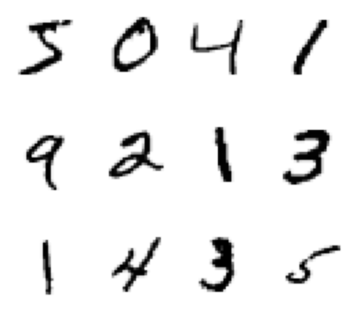

In [5]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(x_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
x_valid.shape

(10000, 28, 28)

In [7]:
y_valid.shape

(10000,)

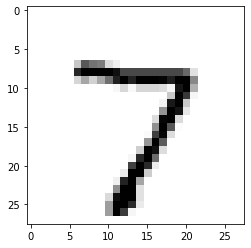

In [8]:
plt.imshow(x_valid[0], cmap='Greys')

In [9]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_valid[0]

7

#### Preprocess data

In [11]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')

In [12]:
grey_scale = 255
x_train /= grey_scale
x_valid /= grey_scale

In [13]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
y_valid[0]

7

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Design Neural Network Architecture

In [17]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
model = Sequential([
    Flatten(input_shape=(28, 28)),
#hidden layer
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'), 
#Output layer
    Dense(10, activation='softmax')
])

W0526 16:47:54.953523 23288 deprecation.py:506] From C:\Users\poulr\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


####  Compile model

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

#### Train

In [20]:
model.fit(x_train, y_train, batch_size= 2000, epochs=10, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 29us/sample - loss: 2.0996 - acc: 0.4090 - val_loss: 1.7529 - val_acc: 0.6795
Epoch 2/10
48000/48000 [==============================] - 1s 31us/sample - loss: 1.4243 - acc: 0.7172 - val_loss: 1.0728 - val_acc: 0.7960
Epoch 3/10
48000/48000 [==============================] - 2s 31us/sample - loss: 0.8968 - acc: 0.8119 - val_loss: 0.6992 - val_acc: 0.8541
Epoch 4/10
48000/48000 [==============================] - 1s 23us/sample - loss: 0.6296 - acc: 0.8574 - val_loss: 0.5164 - val_acc: 0.8827
Epoch 5/10
48000/48000 [==============================] - 1s 31us/sample - loss: 0.4910 - acc: 0.8817 - val_loss: 0.4214 - val_acc: 0.8970
Epoch 6/10
48000/48000 [==============================] - 1s 27us/sample - loss: 0.4136 - acc: 0.8956 - val_loss: 0.3664 - val_acc: 0.9057
Epoch 7/10
48000/48000 [==============================] - 1s 23us/sample - loss: 0.3659 - acc: 0.9033 - val_loss: 0.

In [21]:
results = model.evaluate(x_valid, y_valid, verbose=0)

####  Performing Inference

In [25]:
print('valid loss, valid acc: ', results)

valid loss, valid acc:  [0.27591127157211304, 0.9211]


In [26]:
model.save('mlp')

In [27]:
new_model = tf.keras.models.load_model('mlp')

In [28]:
predictions = new_model.predict([x_valid])

In [29]:
print(predictions)

[[1.2529350e-03 1.9874086e-04 1.2211173e-03 ... 9.8563623e-01
  3.5697970e-04 5.1842923e-03]
 [1.1372652e-02 6.6857547e-03 9.3088555e-01 ... 3.1261178e-04
  6.9639161e-03 7.0443581e-05]
 [1.1608815e-04 9.7773474e-01 7.0812409e-03 ... 3.9772410e-03
  2.8446929e-03 8.8376593e-04]
 ...
 [6.1621635e-05 3.2172471e-04 4.6089178e-04 ... 2.2664783e-03
  1.3135747e-02 6.8324074e-02]
 [1.3688819e-03 1.1944019e-03 1.9305902e-04 ... 1.4086538e-04
  5.7079889e-02 2.0480160e-04]
 [1.0461591e-03 1.4404804e-04 2.0980476e-03 ... 7.7617879e-05
  2.4964631e-04 8.3845662e-05]]


In [30]:
import numpy as np

print(np.argmax(predictions[0]))

7


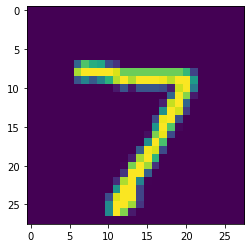

In [31]:
plt.imshow(x_valid[0])
plt.show()